### Applied Data Science Capstone Project

### Week 1 - Creating notebook

In [2]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


**Week 1 - Introduction to Capstone Project**<br>
    Introduction to Capstone Project<br>
    Location Data Providers<br>
    Signing-up for a Watson Studio Account<br>
    Peer-review Assignment: Capstone Project Notebook<br>
    
**Week 2 - Foursquare API**<br>
    Introduction to Foursquare<br>
    Getting Foursquare API Credentials<br>
    Using Foursquare API<br>
    Lab: Foursquare API<br>
    Quiz: Foursquare API<br>
    
**Week 3 - Neighborhood Segmentation and Clustering**<br>
    Clustering<br>
    Lab: Clustering<br>
    Lab: Segmenting and Clustering Neighborhoods in New York City<br>
    Peer-review Assignment: Segmenting and Clustering Neighborhoods in Toronto<br>
    
**Week 4 - Capstone Project**<br>

**Week 5 - Capstone Project (Cont'd)**<br>

In [3]:
import pandas as pd
import numpy as np

### Week 3 Part 1 - Creating a Dataframe

Read the table from the Wkipedia page

In [4]:
df=pd.read_html("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")[0]

Discart not assigned Borough 

In [5]:
df_b=df[df['Borough'] != 'Not assigned']

In [6]:
df_b.head()

,Postal Code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


Check for not assigned Neighborhood

In [7]:
df_n=df_b[df_b['Neighborhood'] == 'Not assigned']

In [8]:
df_n.head()

,Postal Code,Borough,Neighborhood


Validating number of rows and columns in the DF

In [9]:
df_b.shape

(103, 3)

### Week 3 Part 2 - Getting coordinates

Reading the coordinates table

In [10]:
ll = pd.read_csv("http://cocl.us/Geospatial_data", header=0)

ll.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


Merge df using Postal Codes

In [11]:
df_c = pd.merge(left=df_b,right=ll,left_on="Postal Code",right_on='Postal Code')
df_c.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


### Week 3 Part 3 - Exploring and clustering neighborhoods in Toronto.

### Exploring the neighborhoods in Toronto

Borough with "Toronto" word

In [12]:
df_t = df_c[df_c['Borough'].str.contains('Toronto',regex=False)]
df_t.head()
df_t.shape

(39, 5)

In [13]:
df_t.columns

Index(['Postal Code', 'Borough', 'Neighborhood', 'Latitude', 'Longitude'], dtype='object')

In [14]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')

Solving environment: done

# All requested packages already installed.

Folium installed


Geographical coordinates of Toronto

In [15]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

address = 'Toronto, CA'

geolocator = Nominatim(user_agent="t_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


Map of Toronto

In [16]:
# create map of TORONTO using latitude and longitude values above:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df_t['Latitude'], df_t['Longitude'], df_t['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

### Foursquare info

In [17]:
# The code was removed by Watson Studio for sharing.

Your credentails:
CLIENT_ID: 53IT0G1UR0FZ1BV3ZNC1HJ4BBGTM35LKRALRKBBI4LPHAGYT
CLIENT_SECRET:N0PED12ECNU4GUF2TD54T3H4ZRPGS2YXQKN2K0VAEYLRRXL3


Now, let's get the top 100 venues that are within a radius of 500 meters.

In [18]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

Function to repeat the same process to all the neighborhoods in Manhattan

In [19]:
import requests # library to handle requests

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Run the above function on each neighborhood and create a new dataframe called toronto_venues.

In [20]:
toronto_venues = getNearbyVenues(names=df_t['Neighborhood'],
                                   latitudes=df_t['Latitude'],
                                   longitudes=df_t['Longitude']
                                  )

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West
High Park, The Junction South
North Toronto West
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Rosedale
Stn A PO Boxes
St. James Town,

Let's check the size of the resulting dataframe

In [21]:
print(toronto_venues.shape)
toronto_venues.head()

(1606, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot
3,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
4,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa


Let's check how many venues were returned for each neighborhood

In [22]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,56,56,56,56,56,56
"Brockton, Parkdale Village, Exhibition Place",23,23,23,23,23,23
Business reply mail Processing Centre,17,17,17,17,17,17
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",16,16,16,16,16,16
Central Bay Street,63,63,63,63,63,63
Christie,16,16,16,16,16,16
Church and Wellesley,74,74,74,74,74,74
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,33,33,33,33,33,33


Let's find out how many unique categories can be curated from all the returned venues

In [23]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 232 uniques categories.


Analyze Each Neighborhood

In [24]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


And let's examine the new dataframe size.

In [25]:
toronto_onehot.shape

(1606, 232)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [26]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store
0,Berczy Park,0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,...,0.000000,0.000000,0.00000,0.00,0.017857,0.000000,0.000000,0.000000,0.000000,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,...,0.000000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Business reply mail Processing Centre,0.058824,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,...,0.000000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.000000,0.0625,0.0625,0.0625,0.125,0.1875,0.125,0.000000,...,0.000000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Central Bay Street,0.015873,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,...,0.000000,0.000000,0.00000,0.00,0.015873,0.000000,0.000000,0.000000,0.000000,0.000000
5,Christie,0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,...,0.000000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Church and Wellesley,0.027027,0.013514,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.013514,...,0.013514,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.013514,0.000000
7,"Commerce Court, Victoria Hotel",0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.040000,...,0.000000,0.000000,0.00000,0.00,0.020000,0.000000,0.000000,0.010000,0.000000,0.000000
8,Davisville,0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,...,0.000000,0.030303,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Davisville North,0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,...,0.000000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Let's confirm the new size

In [27]:
toronto_grouped.shape

(39, 232)

Let's print each neighborhood along with the top 5 most common venues

In [28]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                venue  freq
0         Coffee Shop  0.07
1        Cocktail Bar  0.05
2  Seafood Restaurant  0.04
3         Cheese Shop  0.04
4              Bakery  0.04


----Brockton, Parkdale Village, Exhibition Place----
                   venue  freq
0                   Café  0.13
1  Performing Arts Venue  0.09
2         Breakfast Spot  0.09
3            Coffee Shop  0.09
4           Intersection  0.04


----Business reply mail Processing Centre----
         venue  freq
0  Yoga Studio  0.06
1      Brewery  0.06
2          Spa  0.06
3   Smoke Shop  0.06
4   Skate Park  0.06


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
              venue  freq
0   Airport Service  0.19
1    Airport Lounge  0.12
2  Airport Terminal  0.12
3          Boutique  0.06
4           Airport  0.06


----Central Bay Street----
                 venue  freq
0          Coffee Shop  0.17
1       Sandwich Place  0.06
2   Ital

**Let's put that into a pandas dataframe**
First, let's write a function to sort the venues in descending order.

In [29]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 5 venues for each neighborhood.

In [30]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(1)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Restaurant,Bakery,Beer Bar,Seafood Restaurant,Cheese Shop,Café,Jazz Club,Shopping Mall


### Cluster the neighborhoods in Toronto

Cluster Neighborhoods with k-mean modeling of Toronto

In [33]:
# 
# find the best k (number of clusters) regarding the inertia_ score
#
# import k-means from clustering stage
from sklearn.cluster import KMeans

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

Ks = 27 # number of ks we will test
inertias = np.zeros((Ks-1))
for n in range(1,Ks):
    
    # run k-means clustering
    kmeans = KMeans(n_clusters=n, random_state=0, n_init = 12).fit(toronto_grouped_clustering)
    inertias[n-1] = kmeans.inertia_

# display the inertia    
inertias

array([2.8433938 , 2.2899749 , 1.95501832, 1.94926481, 1.72632109,
       1.44043499, 1.27551393, 1.15841907, 1.08101978, 0.95334888,
       0.85135892, 0.80678054, 0.71087636, 0.66530818, 0.59584816,
       0.56750685, 0.50595834, 0.45976303, 0.41221257, 0.38339257,
       0.328964  , 0.2842577 , 0.25658357, 0.23286839, 0.19941223,
       0.17199388])

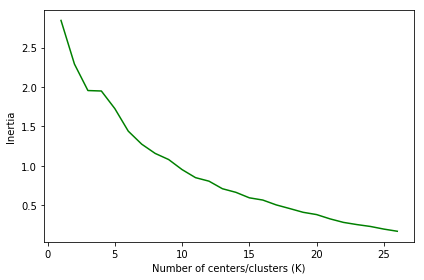

In [34]:
# 
# plot the inertia with the different k to find the better balance
#
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(1,Ks),inertias,'g')
plt.ylabel('Inertia ')
plt.xlabel('Number of centers/clusters (K)')
plt.tight_layout()
plt.show()

In [35]:
# I decide to choose 27 as it is a good balance between clutering reability and inertia score
kclusters = 27

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([ 7, 24, 21,  9,  0, 14,  0,  0, 16,  8], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [36]:
neighborhoods_venues_sorted.columns

Index(['Neighborhood', '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue'],
      dtype='object')

In [37]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df_t

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,26,Coffee Shop,Bakery,Park,Breakfast Spot,Pub,Café,Theater,Ice Cream Shop,French Restaurant,Historic Site
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,15,Coffee Shop,Sushi Restaurant,Fried Chicken Joint,Burrito Place,Juice Bar,Café,Japanese Restaurant,Italian Restaurant,Beer Bar,Distribution Center
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,7,Clothing Store,Coffee Shop,Middle Eastern Restaurant,Restaurant,Bubble Tea Shop,Café,Japanese Restaurant,Italian Restaurant,Cosmetics Shop,Bookstore
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,7,Coffee Shop,Café,Cocktail Bar,American Restaurant,Gastropub,Cosmetics Shop,Department Store,Beer Bar,Restaurant,Italian Restaurant
19,M4E,East Toronto,The Beaches,43.676357,-79.293031,6,Asian Restaurant,Pub,Health Food Store,Trail,Dog Run,Dessert Shop,Diner,Discount Store,Distribution Center,Women's Store


Finally, let's visualize the resulting clusters

In [38]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Exmples of clusters

Coffee shops and restaurants in downtown

In [39]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,Downtown Toronto,0,Coffee Shop,Sandwich Place,Italian Restaurant,Japanese Restaurant,Café,Department Store,Ice Cream Shop,Thai Restaurant,Salad Place,Burger Joint
30,Downtown Toronto,0,Coffee Shop,Café,Restaurant,Thai Restaurant,Hotel,Deli / Bodega,Clothing Store,Gym,Bookstore,Concert Hall
36,Downtown Toronto,0,Coffee Shop,Aquarium,Café,Hotel,Brewery,Fried Chicken Joint,Restaurant,Scenic Lookout,Sporting Goods Shop,Italian Restaurant
42,Downtown Toronto,0,Coffee Shop,Café,Hotel,Restaurant,Salad Place,American Restaurant,Seafood Restaurant,Japanese Restaurant,Italian Restaurant,Asian Restaurant
48,Downtown Toronto,0,Coffee Shop,Restaurant,Café,Hotel,Gym,American Restaurant,Italian Restaurant,Seafood Restaurant,Deli / Bodega,Japanese Restaurant
97,Downtown Toronto,0,Coffee Shop,Café,Gym,Japanese Restaurant,Hotel,Restaurant,Seafood Restaurant,American Restaurant,Steakhouse,Asian Restaurant
99,Downtown Toronto,0,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Restaurant,Café,Hotel,Pub,Yoga Studio,Gay Bar,Gastropub


Parks, restaurants and outdoor activities in Central toronto

In [40]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
83,Central Toronto,2,Park,Restaurant,Summer Camp,Tennis Court,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run


Parks, and stores in Central toronto

In [41]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
68,Central Toronto,4,Park,Jewelry Store,Trail,Sushi Restaurant,Bus Line,Department Store,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop
